In [19]:
import pandas as pd

In [20]:
populations=  pd.read_excel('populations.xlsx')

In [21]:
projections= pd.read_excel('projections.xlsx')

In [22]:
combined= pd.merge(populations, projections, on="LA")

In [23]:
combined=combined.dropna()

In [24]:
combined

,LA,2023,2030
0,Barking and Dagenham,222308,220834.0
1,Barnet,395007,422214.0
2,Barnsley,248449,262376.0
3,Bath and North East Somerset,199818,210848.0
4,Bedford,189891,186453.0
...,...,...,...
146,Wirral,324852,329608.0
147,Wokingham,183870,184322.0
148,Wolverhampton,272425,279846.0
149,Worcestershire,614185,638783.0


In [26]:

combined[2023] = pd.to_numeric(combined[2023], errors='coerce') 



In [27]:
import numpy as np
combined["percentage_difference"] = ((combined[2030] - combined[2023]) / combined[2023].replace(0, np.nan)) * 100

combined['percentage_difference'] = combined['percentage_difference'].round(1)


In [28]:
combined.dtypes

LA                        object
2023                       int64
2030                     float64
percentage_difference    float64
dtype: object

In [29]:

max_value = combined["percentage_difference"].max()
min_value = combined["percentage_difference"].min()

print(f"Highest Percentage Difference: {max_value}")
print(f"Lowest Percentage Difference: {min_value}")



Highest Percentage Difference: 34.7
Lowest Percentage Difference: -31.8


In [30]:

highest_row = combined.loc[combined["percentage_difference"].idxmax()]


print("Row with the highest percentage difference:")
print(highest_row)


Row with the highest percentage difference:
LA                       Westminster
2023                          211508
2030                        284985.0
percentage_difference           34.7
Name: 142, dtype: object


In [31]:
combined

,LA,2023,2030,percentage_difference
0,Barking and Dagenham,222308,220834.0,-0.7
1,Barnet,395007,422214.0,6.9
2,Barnsley,248449,262376.0,5.6
3,Bath and North East Somerset,199818,210848.0,5.5
4,Bedford,189891,186453.0,-1.8
...,...,...,...,...
146,Wirral,324852,329608.0,1.5
147,Wokingham,183870,184322.0,0.2
148,Wolverhampton,272425,279846.0,2.7
149,Worcestershire,614185,638783.0,4.0


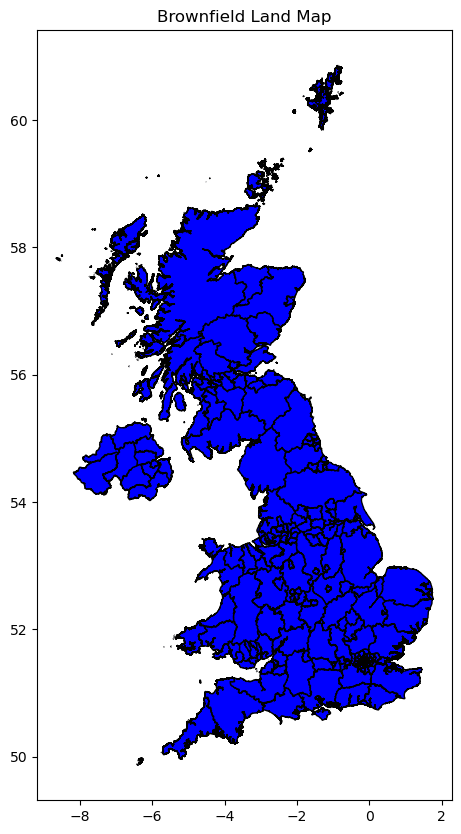

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read GeoJSON file into GeoPandas DataFrame
file_path = r"Counties_and_Unitary_Authorities_December_2019_FCB_UK_2022_997239636395324234.geojson"
geo_df = gpd.read_file(file_path)

# Plot the map
geo_df.plot(figsize=(10, 10), color='blue', edgecolor='black')
plt.title("Brownfield Land Map")
plt.show()

In [33]:
print(geo_df.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    216 non-null    int64   
 1   ctyua19cd   216 non-null    object  
 2   ctyua19nm   216 non-null    object  
 3   ctyua19nmw  216 non-null    object  
 4   bng_e       216 non-null    int64   
 5   bng_n       216 non-null    int64   
 6   long        216 non-null    float64 
 7   lat         216 non-null    float64 
 8   GlobalID    216 non-null    object  
 9   geometry    216 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(4)
memory usage: 17.0+ KB
None


In [34]:
merged_df = geo_df.merge(combined, left_on='ctyua19nm', right_on='LA')

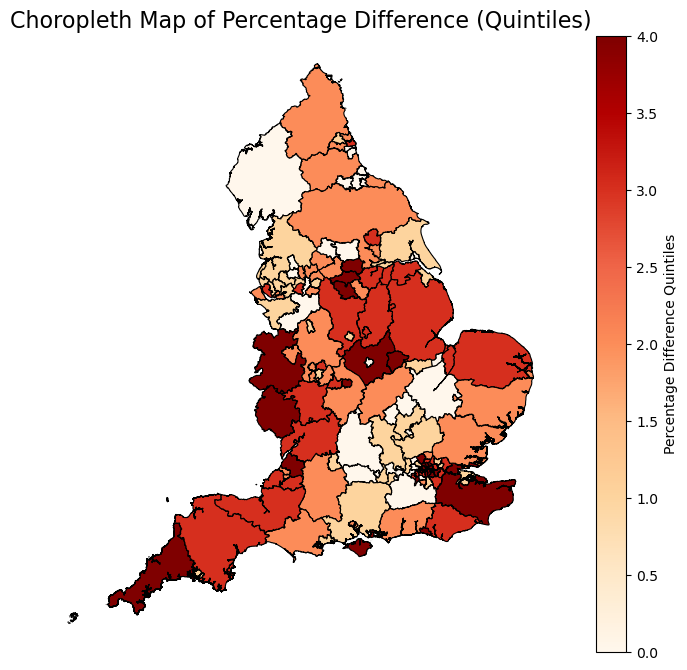

In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

merged_df['quintiles'] = pd.qcut(merged_df['percentage_difference'], 5, labels=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_df.plot(
    column='quintiles',         
    cmap='OrRd',                   
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax,
    legend_kwds={'label': "Percentage Difference Quintiles", 'orientation': "vertical"}
)


ax.set_title("Choropleth Map of Percentage Difference (Quintiles)", fontsize=16)
ax.axis("off") 
plt.show()


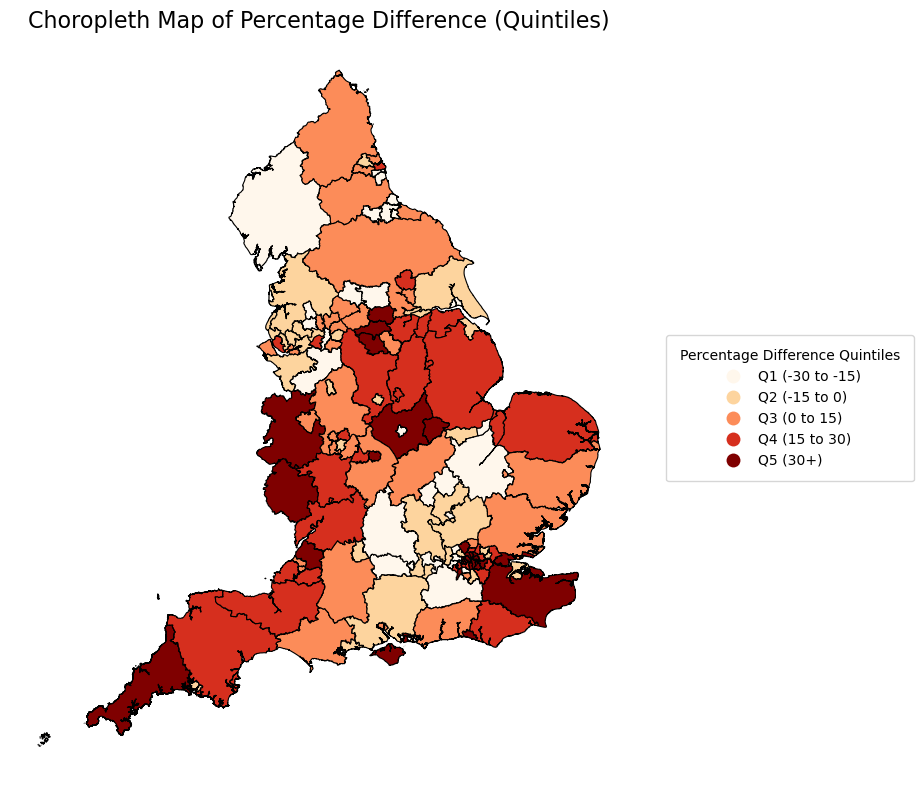

In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

merged_df['quintiles'] = pd.qcut(merged_df['percentage_difference'], 5, labels=["Q1 (-30 to -15)", "Q2 (-15 to 0)", "Q3 (0 to 15)", "Q4 (15 to 30)", "Q5 (30+)"])


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_df.plot(
    column='quintiles',            
    cmap='OrRd',                   
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax,
    legend_kwds={
        'title': "Percentage Difference Quintiles", 
        'bbox_to_anchor': (1.05, 0.5),
        'loc': 'center left',
        'borderpad': 1.0
    }
)


ax.set_title("Choropleth Map of Percentage Difference (Quintiles)", fontsize=16)
ax.axis("off")  

plt.tight_layout()  
plt.show()



In [38]:
merged_df

,OBJECTID,ctyua19cd,ctyua19nm,ctyua19nmw,bng_e,bng_n,long,lat,GlobalID,geometry,LA,2023,2030,percentage_difference,scaled_difference,quintiles
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.676140,6fd7fa93-f553-4dce-9feb-29fbb5ba5322,"MULTIPOLYGON (((-1.26846 54.72612, -1.26822 54...",Hartlepool,95366,93652.0,-1.8,-1.029619,0
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544670,ed43fa5a-bcdf-41da-85bf-8266417c779e,"MULTIPOLYGON (((-1.24928 54.59072, -1.24917 54...",Middlesbrough,152650,139361.0,-8.7,-2.272126,0
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,e89799bb-f37f-4eb9-8474-075fd12e6dcd,"MULTIPOLYGON (((-1.13485 54.64296, -1.13505 54...",Redcar and Cleveland,137938,140954.0,2.2,1.163151,2
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,cb74f990-b9cc-4aec-86b7-f466367cc006,"MULTIPOLYGON (((-1.31729 54.64480, -1.31715 54...",Stockton-on-Tees,202415,200444.0,-1.0,-0.693147,0
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.535339,46e27da9-f9eb-4f25-a6e0-d2ba349928a5,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670...",Darlington,110562,107056.0,-3.2,-1.435085,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,E10000029,Suffolk,,608219,266120,1.04919,52.253849,bbaea6f7-7047-4fd9-bff9-ddf27bb520e6,"MULTIPOLYGON (((1.68546 52.54964, 1.68608 52.5...",Suffolk,776442,794839.0,2.4,1.223775,2
147,148,E10000030,Surrey,,515966,153408,-0.33911,51.268028,03a10511-6dc3-4673-8619-5b90a19d9d73,"POLYGON ((-0.51566 51.46827, -0.51385 51.46798...",Surrey,1228671,1212948.0,-1.3,-0.832909,0
148,149,E10000031,Warwickshire,,429584,253588,-1.56874,52.179771,7cb64984-c95a-4bd1-9e10-104af8116134,"POLYGON ((-1.57699 52.67837, -1.57693 52.67835...",Warwickshire,617823,630395.0,2.0,1.098612,2
149,150,E10000032,West Sussex,,508316,118010,-0.45933,50.951340,886bed79-dd6a-4a44-94cc-d3d701964e5e,"MULTIPOLYGON (((-0.17737 51.16724, -0.17671 51...",West Sussex,900862,923645.0,2.5,1.252763,2
